In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.datasets import make_blobs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable
from sklearn.preprocessing import MinMaxScaler

In [56]:
# load xkcd font
fm.fontManager.addfont('./plot_fonts/xkcd.otf')

In [57]:
# generate example data
X, _ = make_blobs(n_samples=300, centers=3, n_features=2, 
                  random_state=42,
                  cluster_std=1.25,
                  center_box=(0, 10))

# Scale the data to a specific range
scaler = MinMaxScaler(feature_range=(0, 10))
X = scaler.fit_transform(X)

In [58]:
np.random.seed(42)
random_student = X[np.random.choice(X.shape[0], 1, replace=False), :]

# euclidean distance between random student and all other students
distances = np.sqrt(np.sum((X - random_student)**2, axis=1))

In [59]:
k = 20
k_closest_values = np.sort(distances)[:k + 1]
k_closest_values

array([0.        , 0.07713285, 0.20072397, 0.24467127, 0.24837806,
       0.30244848, 0.45220336, 0.45499677, 0.51931633, 0.53870401,
       0.55709786, 0.57626316, 0.58731576, 0.60980101, 0.64045219,
       0.64547946, 0.65138807, 0.68366151, 0.71734262, 0.7228302 ,
       0.76407632])

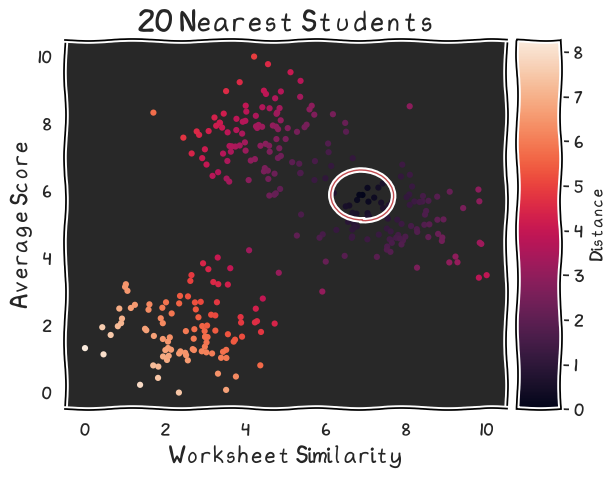

In [60]:
# plot again with the random distances as a hue
with plt.xkcd():
    sns.set_theme(rc={
        'axes.facecolor':'#282828',
        'figure.facecolor':'#282828',
        'axes.edgecolor':'black',
        'axes.grid':False,
        'font.family':'xkcd',
        'font.size':12,
    })

    fig, ax = plt.subplots(frameon=False)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=distances,
                    s=20,
                    edgecolor="none",
                    legend=False,
                    palette='rocket',
                    )
    plt.xlabel('Worksheet Similarity', fontsize=16)
    plt.ylabel('Average Score', fontsize=16)
    plt.title(f'{k} Nearest Students', fontsize=20)

    # draw circle around random student
    circle = plt.Circle((random_student[0, 0], random_student[0, 1]), 
                        k_closest_values[-1],
                        color='r', 
                        fill=False)
    ax.add_artist(circle)

    # add colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="10%", pad=0.1)
    sm = ScalarMappable(None, cmap='rocket')
    sm.set_array(distances)
    plt.colorbar(sm, cax=cax, label='Distance')

    plt.show()

fig.subplots_adjust(bottom=0.15)     
fig.savefig('../content/projects/edplace/k_nearest.png', 
            dpi=300,
            transparent=True,
            pad_inches=0)
